### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
#Percentage of null values in each column
print ("Percentage of null values in each column\n")
print((data.isnull().sum()/len(data)*100))

#Number of duplicates
print ("Total number of duplicates in the data\n")
print(len(data[data.duplicated()]))


Percentage of null values in each column

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64
Total number of duplicates in the data

74


3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
#Car column has 99% null values, drop it 
data = data.drop('car', axis=1) 

#Drop the other null valued rows (Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50 columns)
data = data.dropna()

#Drop the 74 duplicates
data = data.drop_duplicates()

#Correct spelling of Passangar column
data.rename(columns = {'passanger': 'passenger'}, inplace = True)

data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12007 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passenger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  object
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  object
 14  Bar                   12007 non-null  object
 15  CoffeeHouse           12007 non-nul

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12007.000000,12007.000000,12007.0,12007.000000,12007.000000,12007.000000,12007.000000,12007.000000
mean,63.301408,0.408845,1.0,0.559507,0.116266,0.215957,0.784043,0.568418
std,19.131641,0.491641,0.0,0.496467,0.320556,0.411502,0.411502,0.495317
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Print the possible values in each column so that it can be used in the future for data wrangling
for col in data:
    print(col)
    print(data[col].unique())
    print('\n')

destination
['No Urgent Place' 'Home' 'Work']


passenger
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']


weather
['Sunny' 'Rainy' 'Snowy']


temperature
[55 80 30]


time
['2PM' '10AM' '6PM' '7AM' '10PM']


coupon
['Restaurant(<20)' 'Coffee House' 'Bar' 'Carry out & Take away'
 'Restaurant(20-50)']


expiration
['1d' '2h']


gender
['Male' 'Female']


age
['21' '46' '26' '31' '41' '50plus' '36' 'below21']


maritalStatus
['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']


has_children
[0 1]


education
['Bachelors degree' 'Some college - no degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']


occupation
['Architecture & Engineering' 'Student' 'Education&Training&Library'
 'Unemployed' 'Healthcare Support' 'Healthcare Practitioners & Technical'
 'Sales & Related' 'Management' 'Arts Design Entertainment Sports & Media'
 'Computer & Mathematical' 'Life Physical Social Science'
 'Personal Care & Service' 'Office

4. What proportion of the total observations chose to accept the coupon? 



57 % of the coupons were accepted


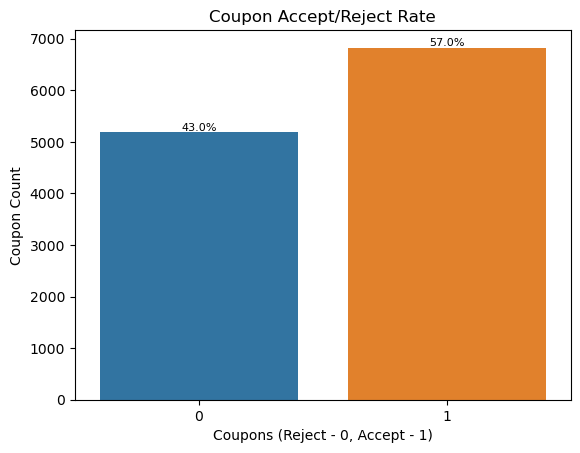

In [10]:
#Determine coupon acceptance
value_counts = data['Y'].value_counts(normalize=True)
print (round(value_counts[1]*100),"% of the coupons were accepted")
#Plot using Seaborn
total = float(len(data))
ax = sns.countplot(data = data, x = "Y")
for p in ax.patches:
    height = p.get_height()
    if np.isnan(height):
        height=0
    percentage = percentage = f'{round(100 * height / total) :.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=8, ha='center', va='bottom')
    
ax.set_title("Coupon Accept/Reject Rate")
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")
ax.set(xticks=[0,1])
    
plt.show()


5. Use a bar plot to visualize the `coupon` column.

In [11]:
#Using plotly
fig = px.histogram(data, x='coupon')
fig.update_traces(marker_color='green')
fig


Text(0, 0.5, 'Coupon Counts')

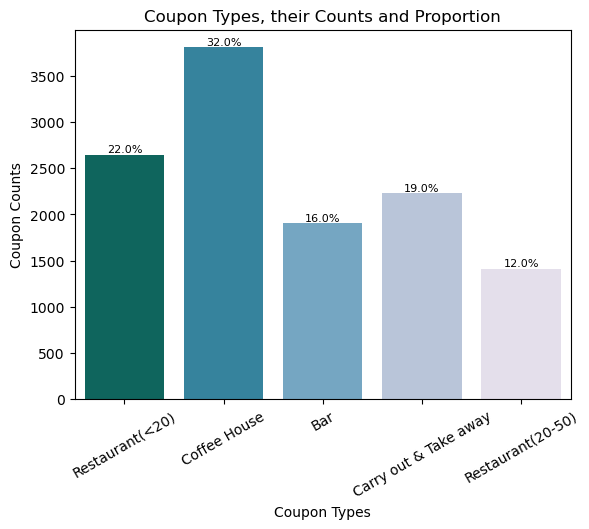

In [12]:
#Using Seaborn
ax = sns.countplot(data = data, x='coupon', palette='PuBuGn_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
for p in ax.patches:
    height = p.get_height()
    if np.isnan(height):
        height=0
    percentage = percentage = f'{round(100 * height / total) :.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=8, ha='center', va='bottom')
ax.set_title("Coupon Types, their Counts and Proportion")
ax.set_xlabel("Coupon Types")
ax.set_ylabel("Coupon Counts")

Text(0, 0.5, 'Coupon Counts')

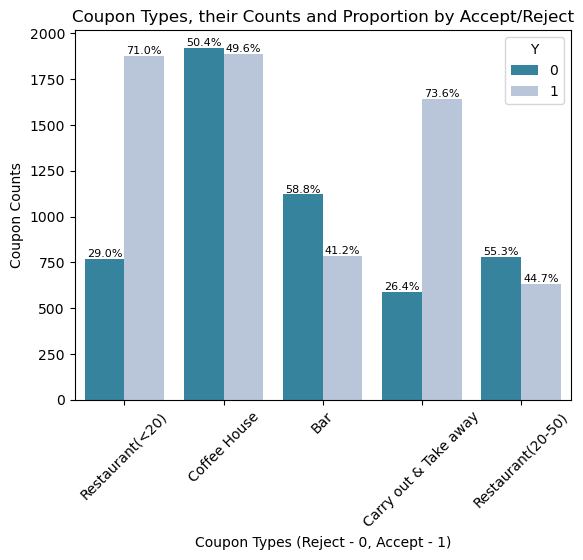

In [13]:
#Using seaborn and classifying by accept/reject
def percentage(ax,fontsize):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=fontsize, ha='center', va='bottom')
ax = sns.countplot(data = data, x = "coupon", hue='Y',palette='PuBuGn_r')
percentage(ax,8)
plt.xticks(rotation=45)
ax.set_title("Coupon Types, their Counts and Proportion by Accept/Reject")
ax.set_xlabel("Coupon Types (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Counts")

6. Use a histogram to visualize the temperature column.

Unique temperature values

[55 80 30]


<Axes: xlabel='temperature', ylabel='Count'>

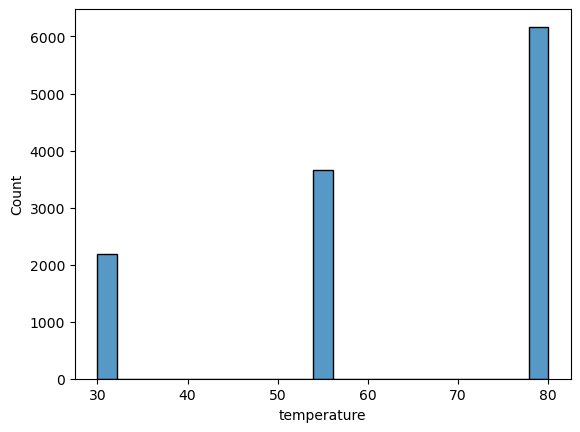

In [14]:
print ("Unique temperature values\n")
print (data['temperature'].unique())
sns.histplot(data = data, x='temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [15]:
data_bar_coupons = data.loc[data['coupon'] == 'Bar']
data_bar_coupons

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


41.2 % of the bar coupons were accepted


Text(0, 0.5, 'Coupon Count')

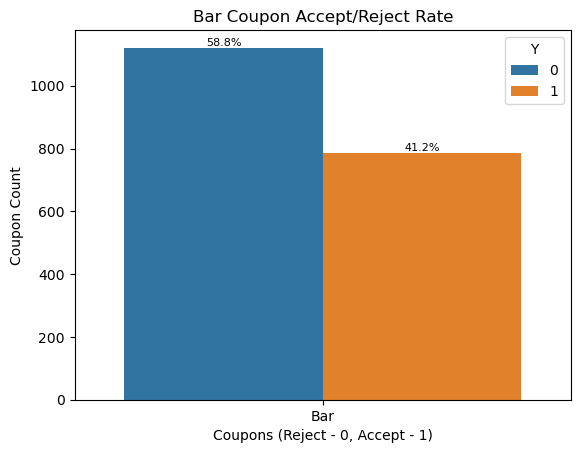

In [16]:
value_counts = data_bar_coupons['Y'].value_counts(normalize=True)
print (round(value_counts[1]*100, 1),'% of the bar coupons were accepted')

#find the count of all columns 
ax = sns.countplot(data = data_bar_coupons, x = "coupon", hue='Y')
percentage(ax,8)
ax.set_title("Bar Coupon Accept/Reject Rate")
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Acceptance rate for those who went to a bar 3 or fewer times a month is: 37.2 %


Text(0, 0.5, 'Coupon Count')

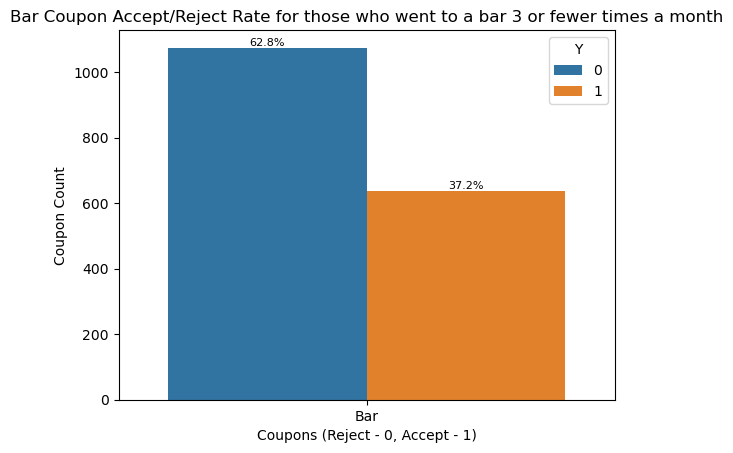

In [17]:
#Bar
#['never' 'less1' '1~3' 'gt8' '4~8']
data_bar_coupons_3orfewer = data_bar_coupons[data_bar_coupons['Bar'].isin(['never','1~3','less1'])]
data_bar_coupons_3orfewer
value_counts = data_bar_coupons_3orfewer['Y'].value_counts(normalize=True)
print ("Acceptance rate for those who went to a bar 3 or fewer times a month is:",
       round(value_counts[1]*100, 1),'%')


#find the count of all columns 
ax = sns.countplot(data = data_bar_coupons_3orfewer, x = "coupon", hue='Y')
percentage(ax,8)
ax.set_title("Bar Coupon Accept/Reject Rate for those who went to a bar 3 or fewer times a month")
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")

Acceptance rate for those who went to a bar more than 3 times a month is: 76.2 %


Text(0, 0.5, 'Coupon Count')

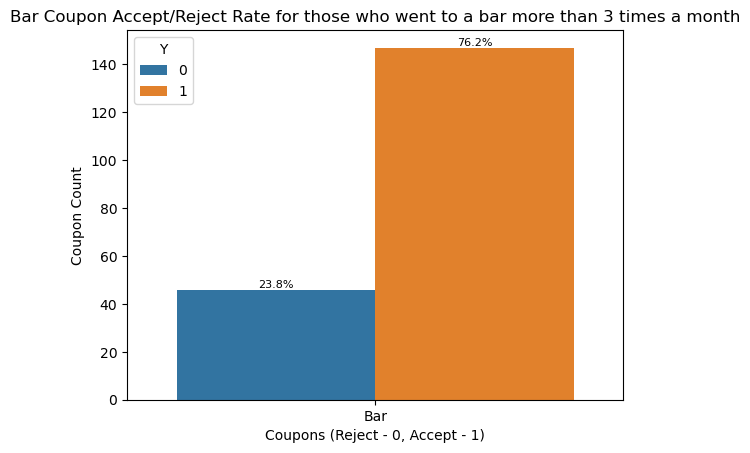

In [18]:
data_bar_coupons_3ormore = data_bar_coupons[data_bar_coupons['Bar'].isin(['gt8','4~8'])]
value_counts = data_bar_coupons_3ormore['Y'].value_counts(normalize=True)
print ("Acceptance rate for those who went to a bar more than 3 times a month is:", round(value_counts[1]*100,1),'%')

ax = sns.countplot(data = data_bar_coupons_3ormore, x = "coupon", hue='Y')
percentage(ax,8)
ax.set_title("Bar Coupon Accept/Reject Rate for those who went to a bar more than 3 times a month")
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 is: 69.0 %


Text(0, 0.5, 'Coupon Count')

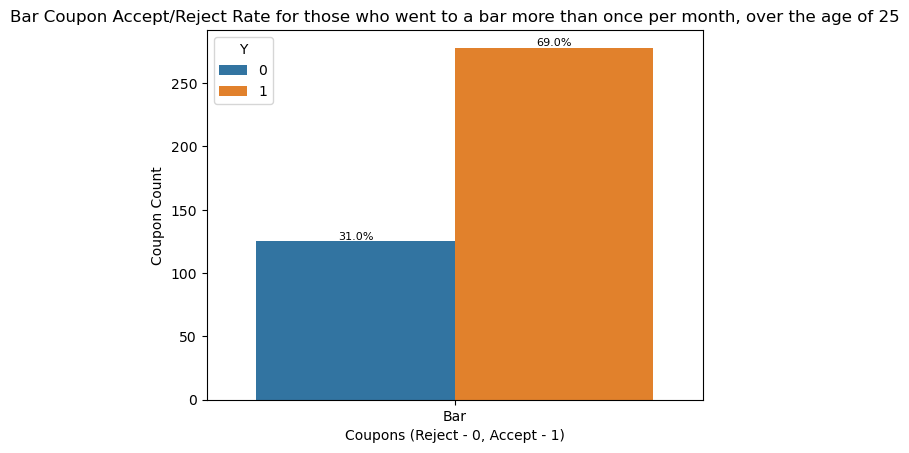

In [19]:
#Age
#['21' '46' '26' '31' '41' '50plus' '36' 'below21']

#Bar
#['never' 'less1' '1~3' 'gt8' '4~8']

data_bar_more_than_once_per_month = data_bar_coupons[data_bar_coupons['age'].isin([ '46','26','31','41','50plus','36']) & data_bar_coupons['Bar'].isin(['1~3','gt8','4~8'])]
data_bar_more_than_once_per_month
value_counts = data_bar_more_than_once_per_month['Y'].value_counts(normalize=True)
print ("Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 is:"
       ,round(value_counts[1]*100,1),'%')
ax = sns.countplot(data = data_bar_more_than_once_per_month, x = "coupon", hue='Y')
percentage(ax,8)
ax.set_title("Bar Coupon Accept/Reject Rate for those who went to a bar more than once per month, over the age of 25")
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")

Acceptance rate for all the others is: 33.7 %


Text(0, 0.5, 'Coupon Count')

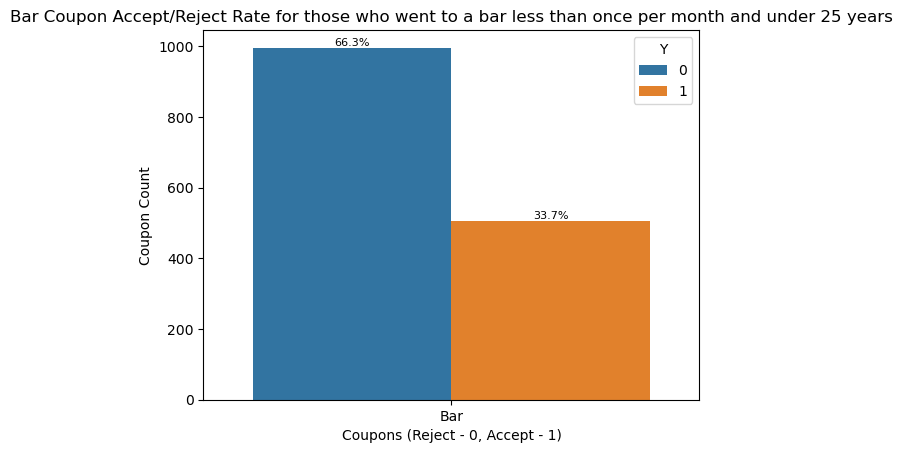

In [20]:
data_bar_all_others = data_bar_coupons[~(data_bar_coupons['age'].isin([ '46','26','31','41','50plus','36']) & data_bar_coupons['Bar'].isin(['1~3','gt8','4~8']))]
data_bar_all_others
value_counts = data_bar_all_others['Y'].value_counts(normalize=True)
print ("Acceptance rate for all the others is:", round(value_counts[1]*100,1),'%')
ax = sns.countplot(data = data_bar_all_others, x = "coupon", hue='Y')
percentage(ax,8)
ax.set_title("Bar Coupon Accept/Reject Rate for those who went to a bar less than once per month and under 25 years")
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is: 70.9 %


Text(0, 0.5, 'Coupon Count')

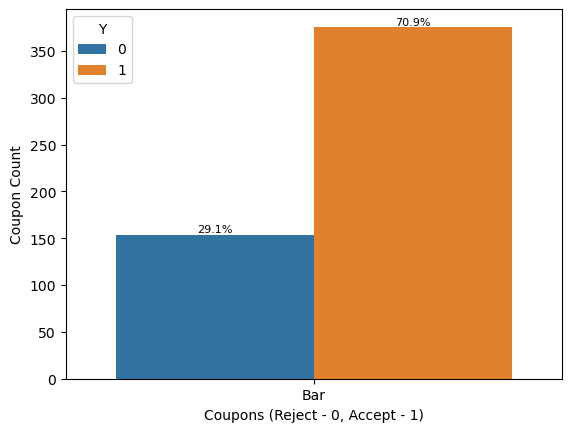

In [21]:
#Bar
#['never' 'less1' '1~3' 'gt8' '4~8']
#passanger
#['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

#occupation
"""['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']"""

data_bar_more_than_once_per_month = data_bar_coupons[data_bar_coupons['Bar'].isin(['1~3','gt8','4~8']) 
                                                     & ~data_bar_coupons['passenger'].isin(['Kid(s)']) 
                                                     & ~data_bar_coupons['occupation'].isin(['Farming Fishing & Forestry'])]
data_bar_more_than_once_per_month
value_counts = data_bar_more_than_once_per_month['Y'].value_counts(normalize=True)
print ("Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is:"
       , round(value_counts[1]*100, 1),'%')
ax = sns.countplot(data = data_bar_more_than_once_per_month, x = "coupon", hue='Y')
percentage(ax,8)
#ax.set_title("Bar Coupon Accept/Reject Rate for those who went to a bar less than once per months and under 25 years")
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [22]:
#maritalStatus
#['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

#Age
#['21' '46' '26' '31' '41' '50plus' '36' 'below21']

#income
#['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
# '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
# 'Less than $12500']

#RestaurantLessThan20
#['4~8' '1~3' 'less1' 'gt8' 'never']





bar_coupon1 = data_bar_coupons[data_bar_coupons['Bar'].isin(['1~3','gt8','4~8']) 
                                                     & ~data_bar_coupons['passenger'].isin(['Kid(s)']) 
                                                     & ~data_bar_coupons['maritalStatus'].isin(['Widowed'])]
value_counts1 = bar_coupon1['Y'].value_counts(normalize=True)
print ("Acceptance rate for those who go to bars more than once a month,"+ 
       "had passengers that were not a kid, and were not widowed is:",
       round(value_counts1[1]*100,1),'%')

bar_coupon2 = data_bar_coupons[data_bar_coupons['Bar'].isin(['1~3','gt8','4~8']) 
                                                     & data_bar_coupons['age'].isin(['21','26','below21'])] 
                                                     
value_counts2 = bar_coupon2['Y'].value_counts(normalize=True)
print ("Acceptance rate for those who go to bars more than once a month and are under the age of 30 is:",
       round(value_counts2[1]*100,1),'%')


bar_coupon3 = data_bar_coupons[data_bar_coupons['RestaurantLessThan20'].isin(['gt8','4~8']) 
                                                     & data_bar_coupons['income'].isin(['$37500 - $49999',  
                                                                                        '$12500 - $24999', 
                                                                                        '$25000 - $37499', 
                                                                                        'Less than $12500'])] 
                                                     
bar_coupon3
value_counts3 = bar_coupon3['Y'].value_counts(normalize=True)
print ("Acceptance rate for those go to cheap restaurants " +
       "more than 4 times a month and income is less than 50K is:",
       round(value_counts3[1]*100,1),'%')

Acceptance rate for those who go to bars more than once a month,had passengers that were not a kid, and were not widowed is: 70.9 %
Acceptance rate for those who go to bars more than once a month and are under the age of 30 is: 72.0 %
Acceptance rate for those go to cheap restaurants more than 4 times a month and income is less than 50K is: 45.6 %


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

They are likely to go to a bar more than once a month
They are also primarily between the ages of 21 and 31
They also are likely to have passengers that were not a kid, so they are likely to have no kids

Recommend targetting coupons to the drivers who match the criteria listed above for maximum coupon acceptance rate


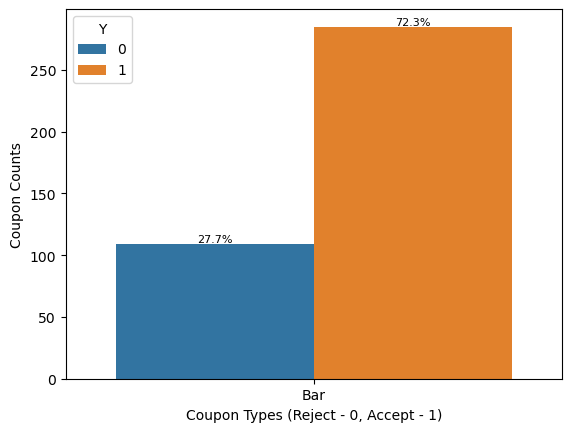

In [23]:
bar_coupon_ideal = data_bar_coupons[data_bar_coupons['Bar'].isin(['1~3','gt8','4~8']) 
                                                     & data_bar_coupons['age'].isin(['21','26','31'])
                                                     & ~data_bar_coupons['passenger'].isin(['Kid(s)']) 
                                                     ] 
ax = sns.countplot(data = bar_coupon_ideal, x = "coupon", hue='Y')
percentage(ax,8)
#ax.set_title("Coupon Types, their Counts and Proportion by Accept/Reject")
ax.set_xlabel("Coupon Types (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Counts")

print ("They are likely to go to a bar more than once a month\n"+
"They are also primarily between the ages of 21 and 31\n"+ 
"They also are likely to have passengers that were not a kid, so they are likely to have no kids\n")


print ("Recommend targetting coupons to the drivers who match the criteria listed above for maximum coupon acceptance rate")



Additional Bar Coupon Investigation

Determine bar coupon acceptance by age, passenger, marital status, weather, income, time and occupation?

Text(0, 0.5, 'Coupon Count')

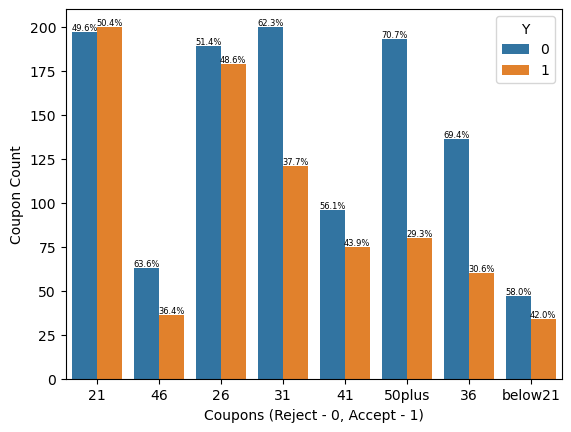

In [41]:
ax = sns.countplot(data = data_bar_coupons, x = "age", hue='Y')
percentage(ax,6)
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")

Text(0, 0.5, 'Coupon Count')

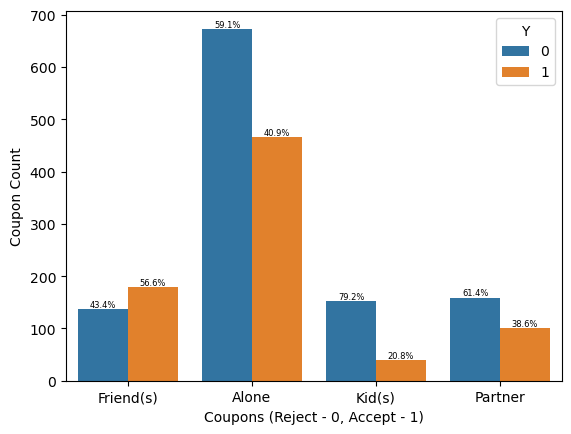

In [42]:
ax = sns.countplot(data = data_bar_coupons, x = "passenger", hue='Y')
percentage(ax,6)
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")

Text(0, 0.5, 'Coupon Count')

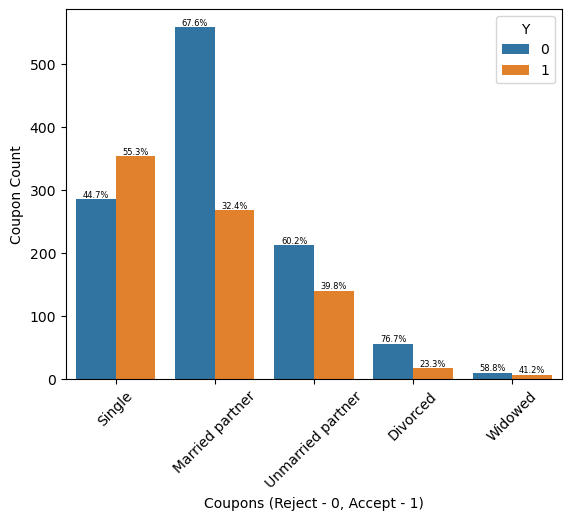

In [44]:
ax = sns.countplot(data = data_bar_coupons, x = "maritalStatus", hue='Y')
percentage(ax,6)
plt.xticks(rotation=45)
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")

Text(0, 0.5, 'Coupon Count')

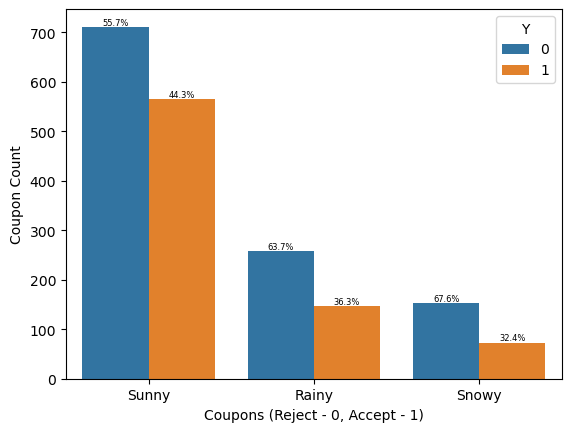

In [45]:
ax = sns.countplot(data = data_bar_coupons, x = "weather", hue='Y')
percentage(ax,6)
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")

Text(0, 0.5, 'Coupon Count')

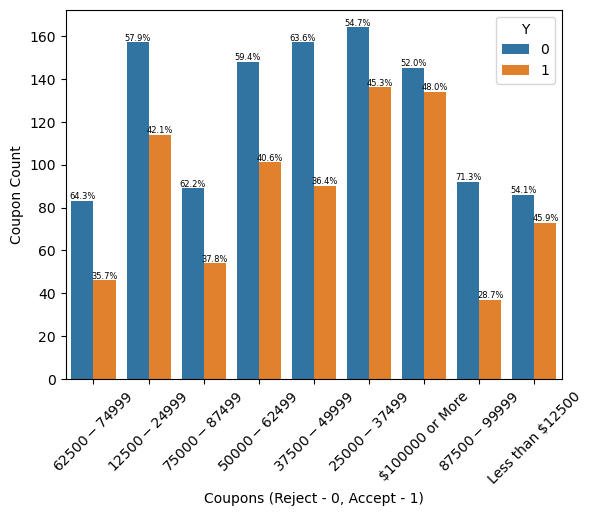

In [47]:
ax = sns.countplot(data = data_bar_coupons, x = "income", hue='Y')
percentage(ax,6)
plt.xticks(rotation=45)
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")

Text(0, 0.5, 'Coupon Count')

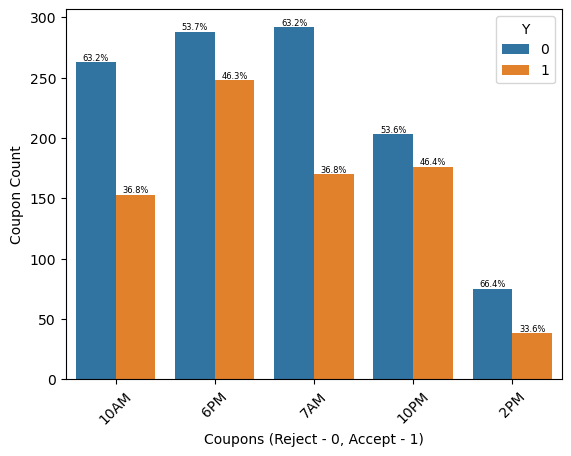

In [48]:
ax = sns.countplot(data = data_bar_coupons, x = "time", hue='Y')
percentage(ax,6)
plt.xticks(rotation=45)
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")

Text(0, 0.5, 'Coupon Count')

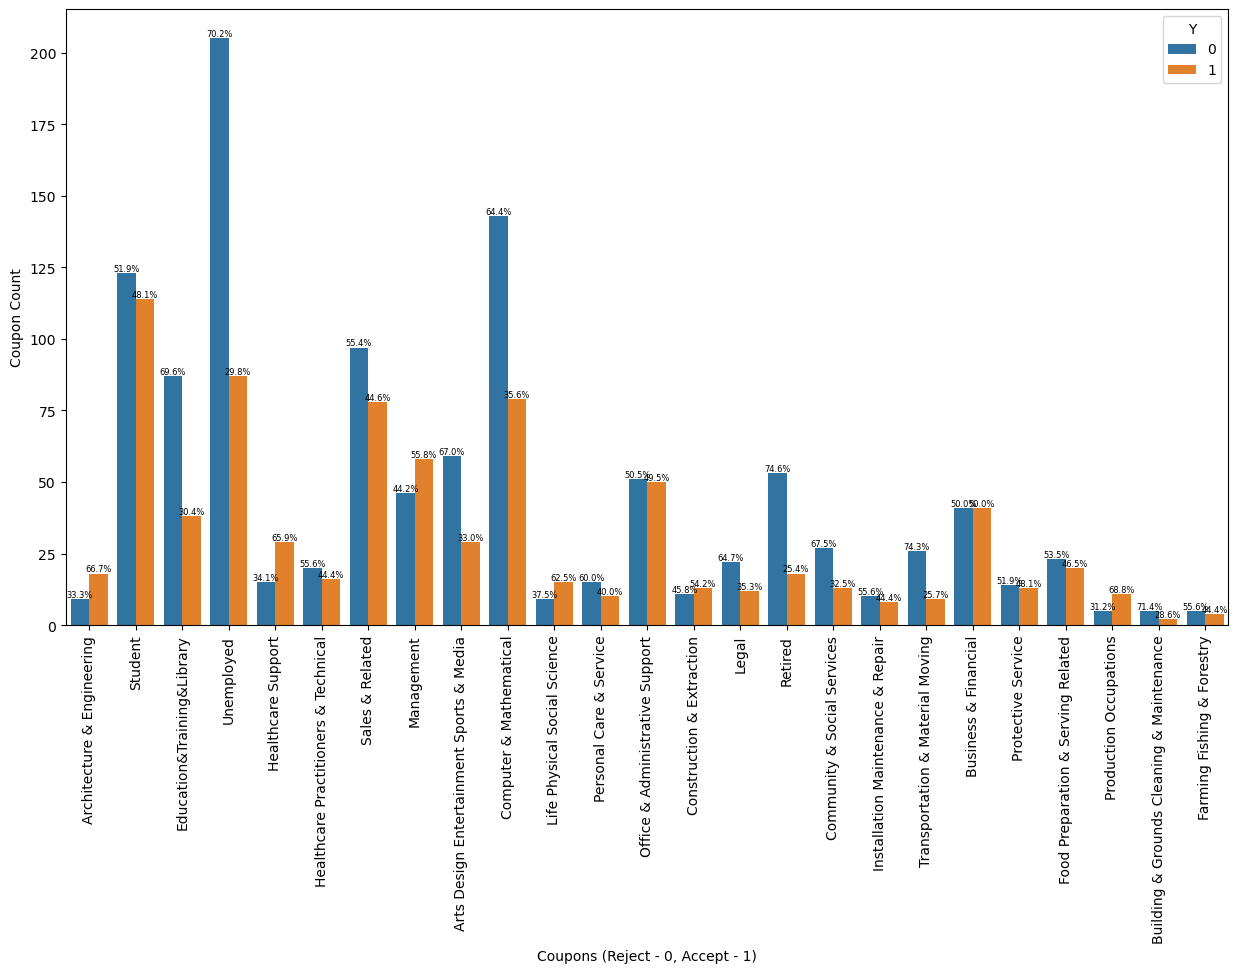

In [54]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data = data_bar_coupons, x = "occupation", hue='Y')
percentage(ax,6)
plt.xticks(rotation=90)
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I will be exploring coupons to expensive restaurants since they have a low acceptance rate in comparison with other coupons. Restaurant (20-50) only has an acceptance rate of 44.7% as seen in the plot below.

Text(0, 0.5, 'Coupon Counts')

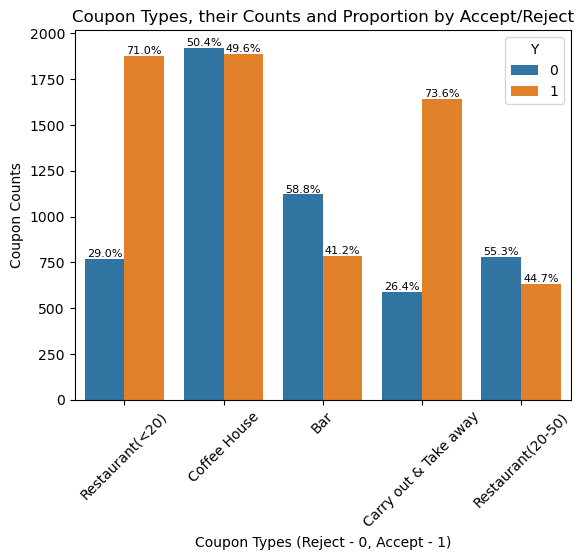

In [24]:
ax = sns.countplot(data = data, x = "coupon", hue='Y')
percentage(ax,8)
plt.xticks(rotation=45)
ax.set_title("Coupon Types, their Counts and Proportion by Accept/Reject")
ax.set_xlabel("Coupon Types (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Counts")

In [25]:
#Create dataframe with these restaurant coupon
data_restaurant2050_coupons = data[data['coupon'] == 'Restaurant(20-50)']
data_restaurant2050_coupons

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
40,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
58,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0
62,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0
80,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12657,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12661,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12669,No Urgent Place,Partner,Sunny,30,10AM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12676,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1


1. What percentage of restaurant20to50 coupon were accepted?

44.7 %


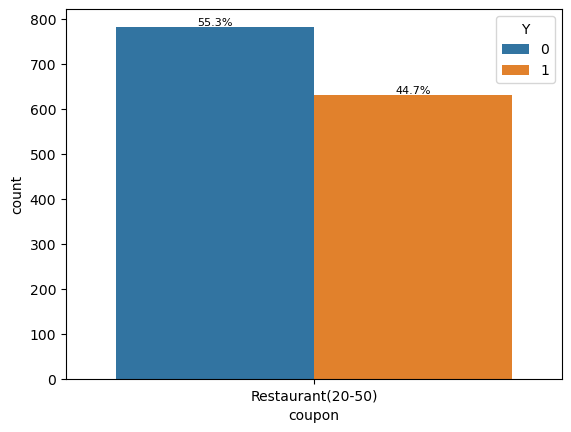

In [26]:
value_counts = data_restaurant2050_coupons['Y'].value_counts(normalize=True)
print (round(value_counts[1]*100,1),'%')

#find the count of all columns 
ax = sns.countplot(data = data_restaurant2050_coupons, x = "coupon", hue='Y')
percentage(ax,8)

2. Determine coupon acceptance by age, passenger, marital status, weather, income, time and occupation?

Text(0, 0.5, 'Coupon Count')

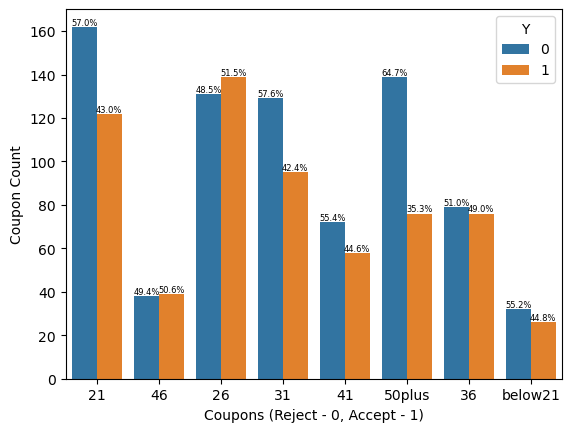

In [27]:
ax = sns.countplot(data = data_restaurant2050_coupons, x = "age", hue='Y')
percentage(ax,6)
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")

Text(0, 0.5, 'Coupon Count')

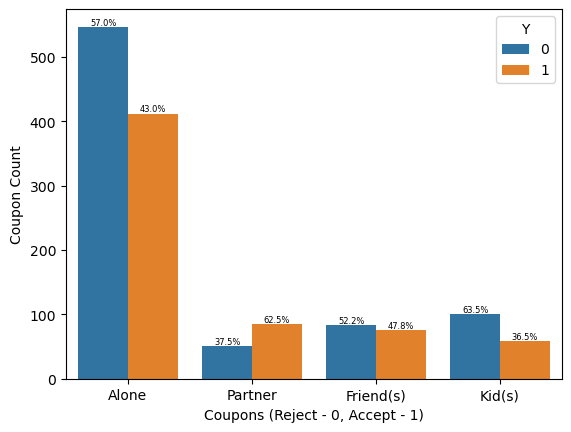

In [28]:
ax = sns.countplot(data = data_restaurant2050_coupons, x = "passenger", hue='Y')
percentage(ax,6)
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")

Text(0, 0.5, 'Coupon Count')

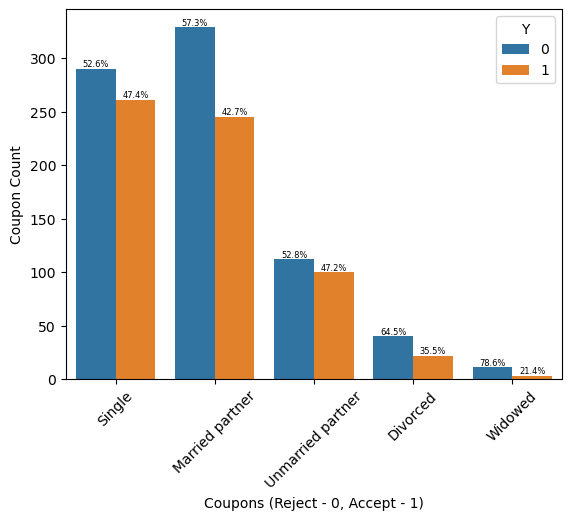

In [29]:
ax = sns.countplot(data = data_restaurant2050_coupons, x = "maritalStatus", hue='Y')
percentage(ax,6)
plt.xticks(rotation=45)
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")

Text(0, 0.5, 'Coupon Count')

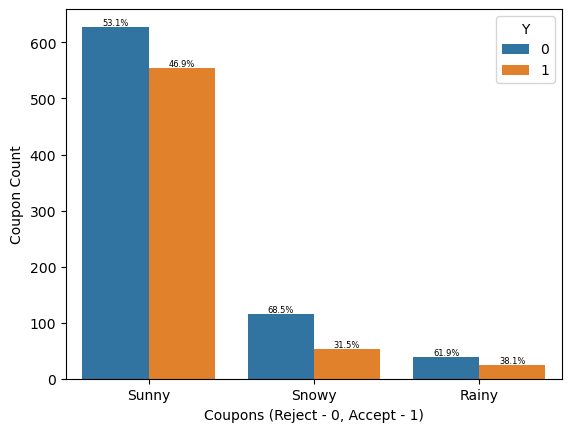

In [30]:
ax = sns.countplot(data = data_restaurant2050_coupons, x = "weather", hue='Y')
percentage(ax,6)
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")

Text(0, 0.5, 'Coupon Count')

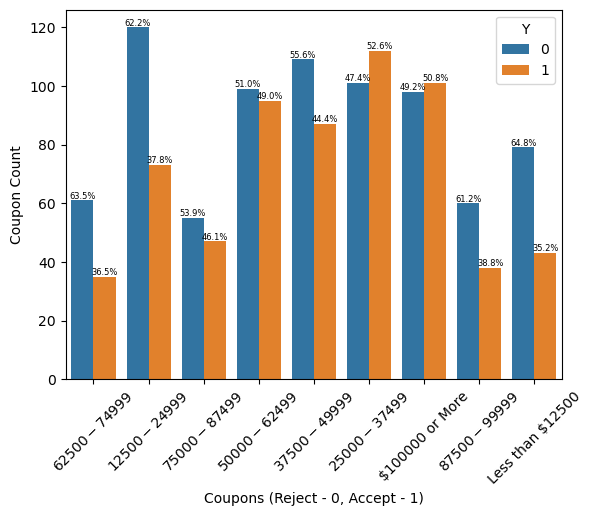

In [31]:
ax = sns.countplot(data = data_restaurant2050_coupons, x = "income", hue='Y')
percentage(ax,6)
plt.xticks(rotation=45)
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")

Text(0, 0.5, 'Coupon Count')

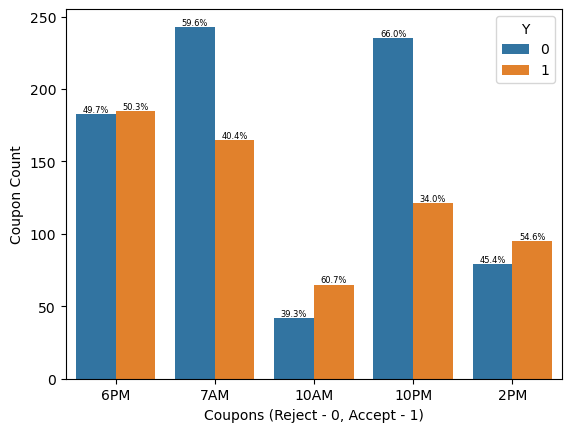

In [32]:
ax = sns.countplot(data = data_restaurant2050_coupons, x = "time", hue='Y')
percentage(ax,6)
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")

Text(0, 0.5, 'Coupon Count')

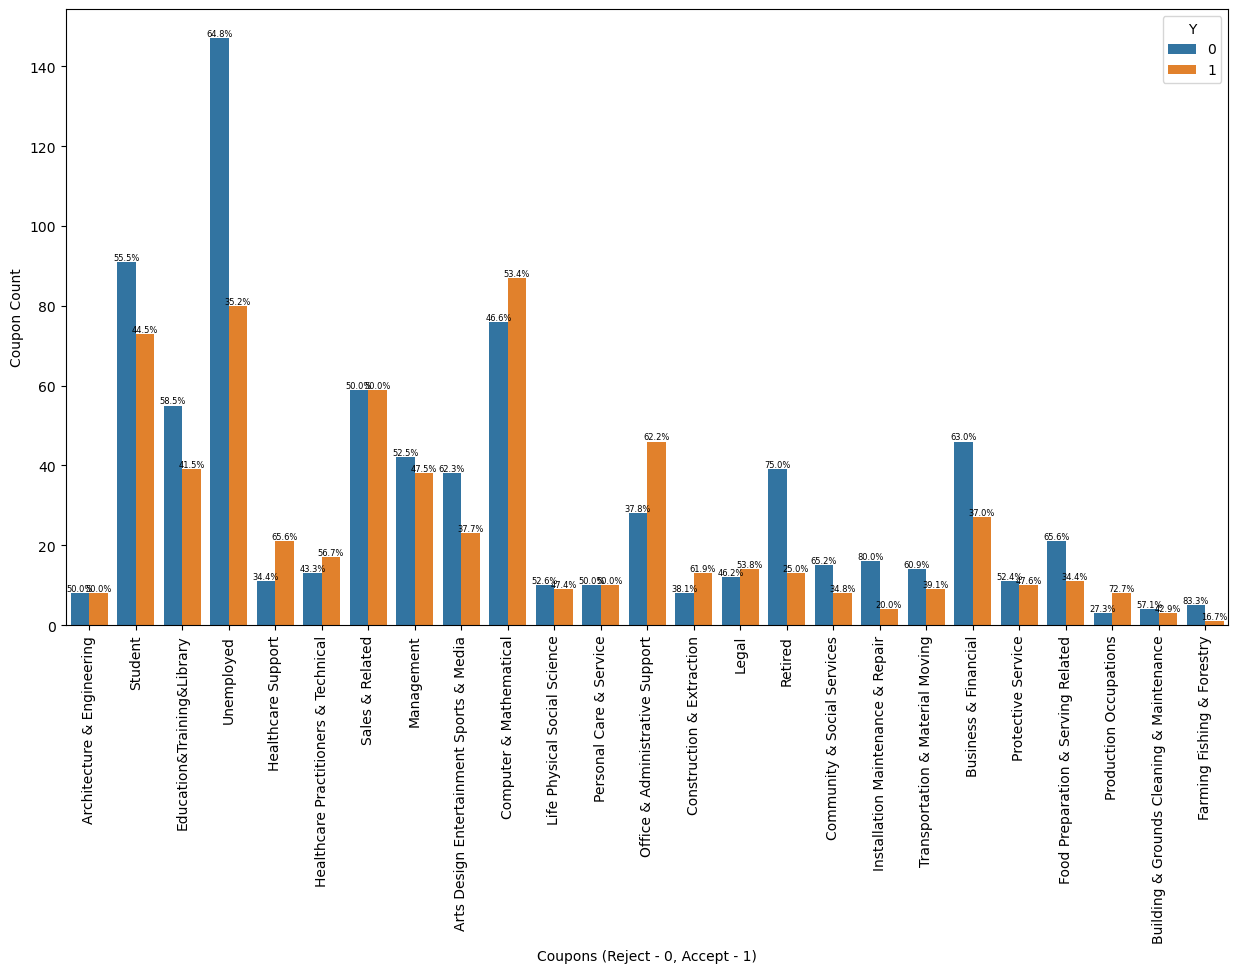

In [33]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data = data_restaurant2050_coupons, x = "occupation", hue='Y')
percentage(ax,6)
plt.xticks(rotation=90)
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")

3. Compare the acceptance rate between those who went to an expensive restaurant 3 or fewer times a month to those who went more.

42.9 %


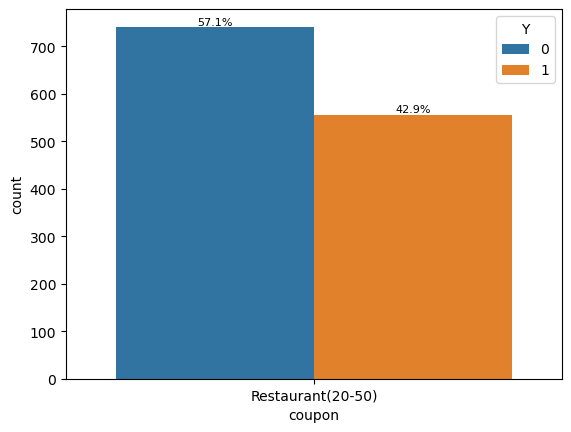

In [34]:
data_restaurant_coupons_3orfewer = data_restaurant2050_coupons.loc[data_restaurant2050_coupons['Restaurant20To50'].isin(['never','1~3','less1'])] 
value_counts = data_restaurant_coupons_3orfewer['Y'].value_counts(normalize=True)
print (round(value_counts[1]*100,1),'%')
ax = sns.countplot(data = data_restaurant_coupons_3orfewer, x = "coupon", hue='Y')
percentage(ax,8)

64.7 %


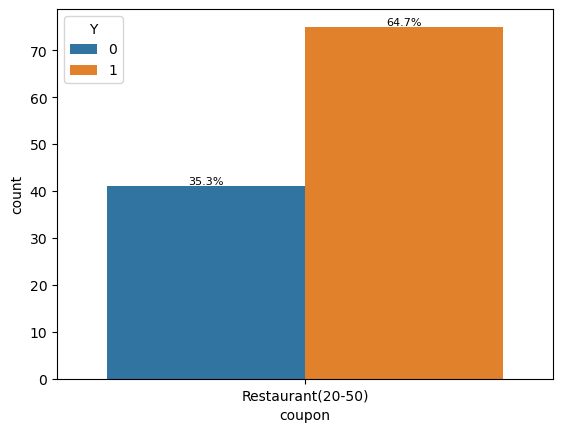

In [35]:
data_restaurant_coupons_3ormore = data_restaurant2050_coupons.loc[data_restaurant2050_coupons['Restaurant20To50'].isin(['gt8','4~8'])]
value_counts = data_restaurant_coupons_3ormore['Y'].value_counts(normalize=True)
print (round(value_counts[1]*100,1),'%')
ax = sns.countplot(data = data_restaurant_coupons_3ormore, x = "coupon", hue='Y')
percentage(ax,8)

3. Compare the acceptance rate between drivers who go to an expensive restaurant more than once a month and between the ages of 26 and 36 to the all others. Is there a difference?

Acceptance rate is: 57.4 %


Text(0, 0.5, 'Coupon Count')

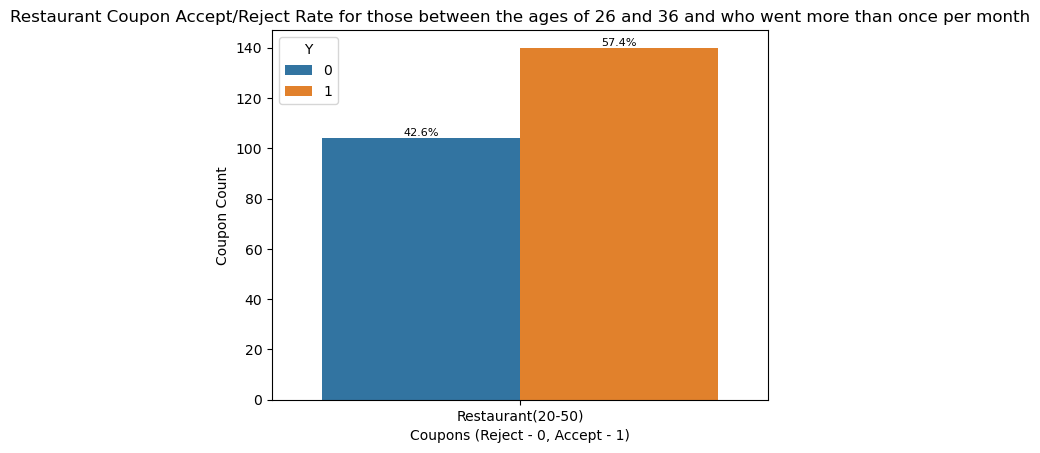

In [36]:
data_res = data_restaurant2050_coupons[(data_restaurant2050_coupons['age'].isin([ '26','31','36']) & data_restaurant2050_coupons['Restaurant20To50'].isin(['1~3','gt8','4~8']))]
value_counts = data_res['Y'].value_counts(normalize=True)
print ("Acceptance rate is:", round(value_counts[1]*100,1),'%')
ax = sns.countplot(data = data_res, x = "coupon", hue='Y')
percentage(ax,8)
ax.set_title("Restaurant Coupon Accept/Reject Rate for those between the ages of 26 and 36 and who went more than once per month")
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")

Acceptance rate is: 42.0 %


Text(0, 0.5, 'Coupon Count')

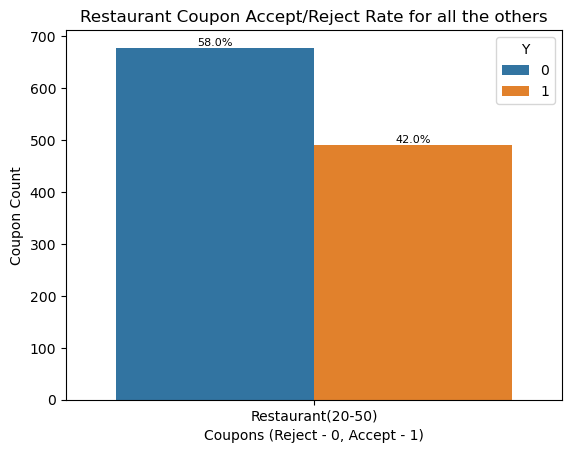

In [37]:
data_res = data_restaurant2050_coupons[~((data_restaurant2050_coupons['age'].isin([ '26','31','36']) & data_restaurant2050_coupons['Restaurant20To50'].isin(['1~3','gt8','4~8'])))]
value_counts = data_res['Y'].value_counts(normalize=True)
print ("Acceptance rate is:", round(value_counts[1]*100,1),'%')
ax = sns.countplot(data = data_res, x = "coupon", hue='Y')
percentage(ax,8)
ax.set_title("Restaurant Coupon Accept/Reject Rate for all the others")
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")

4. Determine the restaurant coupon acceptance rate for those who went more than 1 time a month and had incomes between $25000 and $100000 and were between the ages of 21 and 46.

Text(0, 0.5, 'Coupon Count')

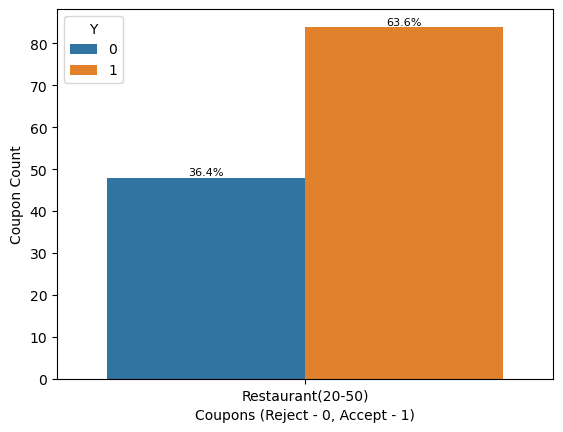

In [38]:
#income
#['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
# '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
# 'Less than $12500']

#['4~8' '1~3' 'less1' 'gt8' 'never']
res_coupon = data_restaurant2050_coupons[(data_restaurant2050_coupons['Restaurant20To50'].isin(['1~3','gt8','4~8']) 
                                                     & data_restaurant2050_coupons['income'].isin([
                                                      '$25000 - $37499',
                                                      '$100000 or More',
                                                      '$87500 - $99999'   
                                                     ])
                                                     & (data_restaurant2050_coupons['age'].isin([ '26','31','36','41','46','below21'])))]
ax = sns.countplot(data = res_coupon, x = "coupon", hue='Y')
percentage(ax,8)
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")

5. Determine the restaurant coupon acceptance rate for those who went more than 1 time a month and had passengers in their car.

Text(0, 0.5, 'Coupon Count')

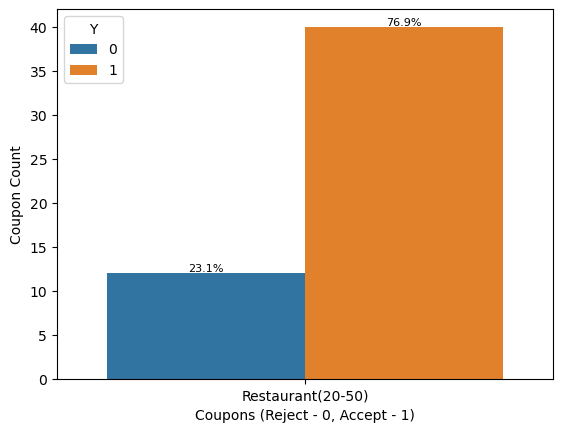

In [39]:
res_coupon = data_restaurant2050_coupons[(data_restaurant2050_coupons['Restaurant20To50'].isin(['1~3','gt8','4~8']) 
                                                     & data_restaurant2050_coupons['passenger'].isin([
                                                     'Partner','Kids'
                                                     ])
                                           )]
ax = sns.countplot(data = res_coupon, x = "coupon", hue='Y')
percentage(ax, 8)
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")

6. Determine the restaurant coupon acceptance rate for those who went more than 1 time a month and had passengers in their car and were between the ages of 21 to 46 and had incomes between 25000 to 37499, and 87500 or higher.

Text(0, 0.5, 'Coupon Count')

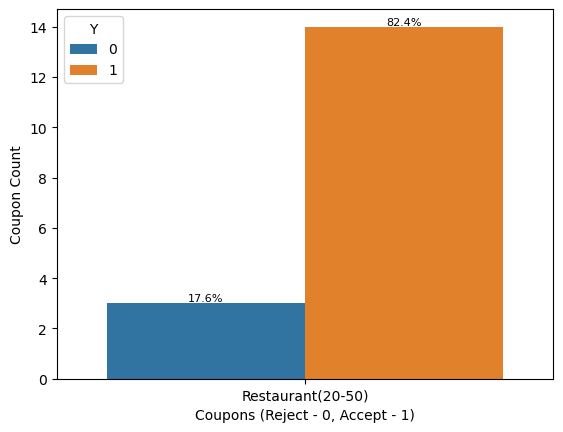

In [40]:
res_coupon = data_restaurant2050_coupons[data_restaurant2050_coupons['Restaurant20To50'].isin(['1~3','gt8','4~8']) 
                                                     & data_restaurant2050_coupons['passenger'].isin([
                                                     'Partner','Kids'
                                                     ])
                                                     & data_restaurant2050_coupons['age'].isin([ '26','31','36','41','46','below21'])
                                                     & data_restaurant2050_coupons['income'].isin([
                                                      '$25000 - $37499',
                                                      '$100000 or More',
                                                      '$87500 - $99999'   
                                                     ])
                                                      ]

ax = sns.countplot(data = res_coupon, x = "coupon", hue='Y')
percentage(ax, 8)
ax.set_xlabel("Coupons (Reject - 0, Accept - 1)")
ax.set_ylabel("Coupon Count")